## Machine Learning
Machine Learning is a field of AI that enables systems to learn patterns from data and make decisions without being explicitly programmed.

### Traditional Programming VS Machine Learning: 
<img src="images/image.png" width="500">

### Scenarios where ML is more important than traditional programming:
There are some cases where programming does not work or not needed.
- Eg: Email spam filtering
    - For creating such we need a software program, we write lots of if-else statements and many more statements to classify the emails.But the logic could need continuous changes each and everytime new ways of spams arrives everytime. 
    - But ML is not like that. One algorithm is what we write and it will learn and finds patterns itself.
- Image classification. 
    - Eg: Dog classification
        - There is no way native s/w programs will help to classify dogs since dogs could be of different breeds. And we have to write lots of program for many breeds (since there are many possibilities).
        - ML can help it classify because it can find the patterns already.


## TYPES of MACHINE LEARNING
- Supervised Learning 
    - Regression
    - Classification 
- Unsupervised Learning 
    - Clustering 
    - Dimensionality Reduction 
    - Anomaly detection 
    - Association
- Semi supervised Learning 
- Reinforcement Learning

### Supervised Learning

Supervised learning trains models on labeled data to predict outcomes for new, unseen data.
Types of Supervised Learning:
- Regression – Predicts continuous values. Example: Estimating salary based on experience, House price prediction.
<img src="images/image1.png" alt="example" width="500"/>

Regression is about "how to get an algorithm to systematically choose the most appropriate line or curve or other thing to fit to this data".
- Classification – Predicts discrete labels or categories. Example: Breast cancer detection.
<img src="images/image2.png" alt="example" width="500"/>


### Unsupervised Learning

Unsupervised learning finds hidden patterns or groupings in unlabeled data.
Types of Unsupervised Learning:
- Clustering – Groups similar data points together. Example: Grouping users by browsing behavior
<img src="images/image3.png" alt="example" width="700"/>
- Dimensionality Reduction – Reduces data features while preserving structure (Feature extraction). Example: PCA algorithm for visualizing high-dimensional data (mnist-784 dimensions to 3 dimension)

### Supervised Learning
Revision of a few Supervised Machine Learning Algorithms.
- Linear Regression
- Logistic Regression


### Linear Regression
Linear Regression is a supervised learning algorithm used to model the relationship between a dependent variable `y` and one or more independent variables `x`. It assumes a linear relationship between the input and output.

**How It Works**  
The model tries to fit a straight line (in 2D) or a hyperplane (in higher dimensions) that best represents the relationship between input features and target output. It minimizes the difference between actual and predicted values using a cost function.

#### For **Simple Linear Regression** (1 input variable):

$$
y = \theta_0 + \theta_1 x
$$

- $y$: Predicted output  
- $x$: Input feature  
- $\theta_0$: Intercept (bias)  
- $\theta_1$: Slope (weight)

---

#### For **Multiple Linear Regression** (multiple input variables):

$$
y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n
$$

Or in vector form:

$$
y = X \theta
$$

Where:  
- $X$: Feature matrix  
- $\theta$: Parameter vector

---

### Cost Function (Mean Squared Error - MSE)

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2
$$

- $m$: Number of training examples  
- $h_\theta(x)$: Predicted value  
- $y$: Actual value




 #### When to Use
- When you need to predict continuous values (e.g., prices, temperatures, scores).
- When there is a linear relationship between input and output features.


### Example Use Cases
- Predicting house prices based on area, location
- Estimating salary based on years of experience
- Forecasting sales based on advertising budget, etc

#### Data load and EDA of the data

In [5]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('Datasets/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
df.shape

(30, 2)

In [8]:
# Check for null value
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [9]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [11]:
# # Dropping irrelevant unnamed column
"""df = df.drop('Unnamed: 0', axis=1)
df.head()"""

"df = df.drop('Unnamed: 0', axis=1)\ndf.head()"

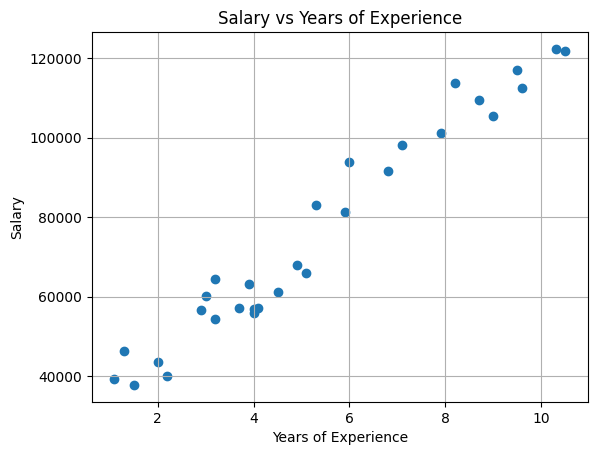

In [12]:
# visualization of data
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.grid(True)
plt.show()

In [13]:
X = df['YearsExperience'].values
y = df['Salary'].values

In [14]:
X.shape

(30,)

In [17]:
X, y = X.reshape(-1, 1), y.reshape(-1, 1)
X.shape

(30, 1)

In [18]:
# Mean normalization and feature scaling
X_mean = np.mean(X)
X_std = np.std(X)
X = (X-X_mean)/X_std

In [19]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [21]:
import numpy as np
import matplotlib.pyplot as plt

class UnivariateLinearRegression():
    def __init__(self, lr=0.01, n_iters=500):
        self.weight = 0.0
        self.bias = 0.0
        self.lr = lr
        self.n_iters = n_iters
        self.loss_history = []
        self.weight_history = []
        self.bias_history = []

    def MSE_loss(self, y_pred, y):
        m = y.shape[0]
        loss = (1/(2 * m)) * np.sum((y_pred - y)**2)
        return loss

    def gradient_descent(self, X, y, y_pred):
        m = y.shape[0]  # number of samples

        # Gradients of weight and bias
        d_w = (1/m) * np.dot(X.T, (y_pred - y))
        d_b = (1/m) * np.sum((y_pred - y))


        self.weight -= self.lr * d_w
        self.bias -= self.lr * d_b

    def fit(self, X, y):
        X = X.reshape(-1, 1)
        y = y.reshape(-1, 1)

        for i in range(self.n_iters):
            y_pred = self.weight * X + self.bias
            loss = self.MSE_loss(y_pred, y)

            self.loss_history.append(loss)
            self.weight_history.append(self.weight)
            self.bias_history.append(self.bias)

            if i % 100 == 0:
                print(f"Iteration {i}, MSE Loss = {loss:.6f}")

            self.gradient_descent(X, y, y_pred)

        return self

    def predict(self, X):
        X = X.reshape(-1, 1)
        return self.weight * X + self.bias


In [22]:
model = UnivariateLinearRegression()
model.fit(X_train, y_train)

Iteration 0, MSE Loss = 3135539921.229167
Iteration 100, MSE Loss = 449644081.750710
Iteration 200, MSE Loss = 74510599.913970
Iteration 300, MSE Loss = 22077314.122736
Iteration 400, MSE Loss = 14744205.578456


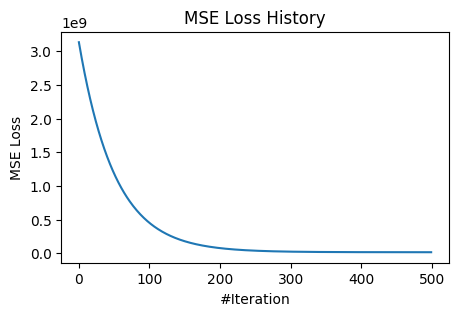

In [23]:
# Plotting Learning Curve
loss_history = model.loss_history
plt.figure(figsize=(5, 3))
sns.lineplot(loss_history)
plt.title("MSE Loss History")
plt.xlabel("#Iteration")
plt.ylabel("MSE Loss")
plt.show()

In [24]:
# Print original and predicted data side by side
predictions = model.predict(X_test)
comparison_df = pd.DataFrame({
    'Original (y)': y_test.flatten(),
    'Predicted': predictions.flatten()
})
print(comparison_df.head(10))

   Original (y)      Predicted
0      112635.0  114908.361261
1       67938.0   70990.725440
2      113812.0  101826.512293
3       83088.0   74728.396573
4       64445.0   55105.623121
5       57189.0   59777.712038


#Multi Linear Regression

In [26]:
house_price_df = pd.read_csv("Datasets/housing_price_dataset.csv")

In [27]:
house_price_df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


# EDA

In [28]:
df.describe(include="all")


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [29]:
df.isna().sum()


YearsExperience    0
Salary             0
dtype: int64

In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


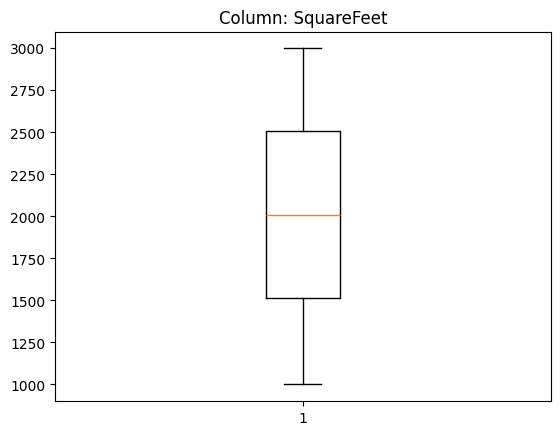

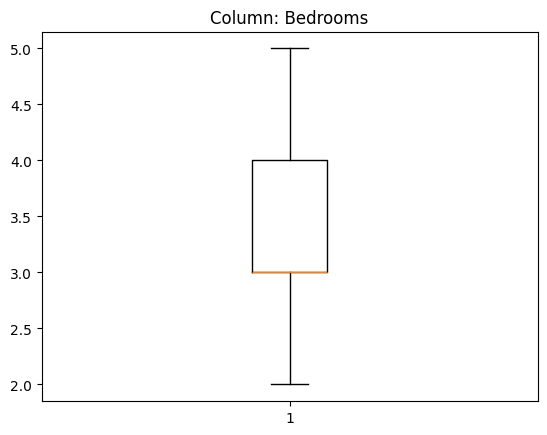

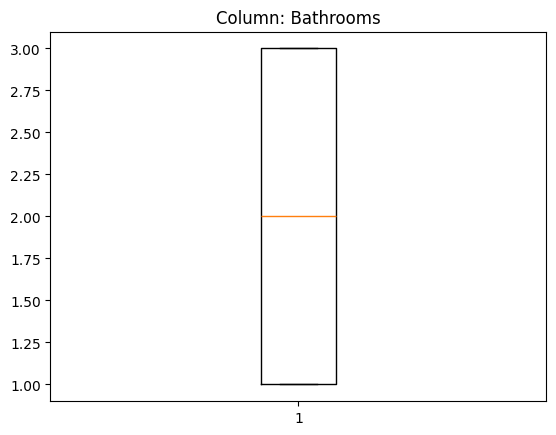

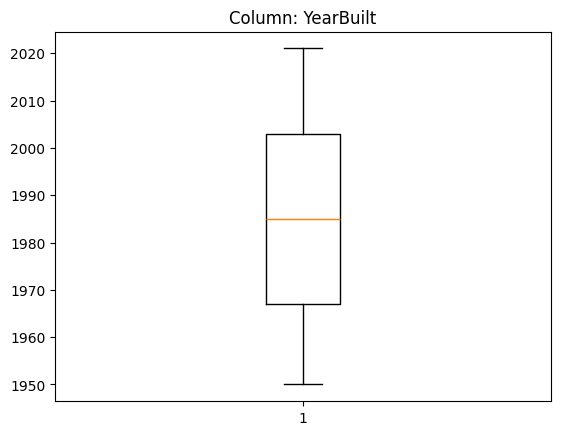

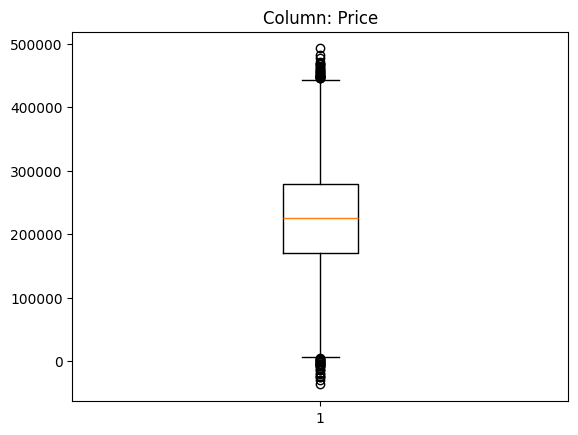

In [31]:
for cols in ['SquareFeet','Bedrooms', 'Bathrooms','YearBuilt','Price']:
    plt.boxplot(house_price_df[cols])
    plt.title(f'Column: {cols}')
    plt.show()

In [32]:
house_price_df['Price'].describe(include="all")


count     50000.000000
mean     224827.325151
std       76141.842966
min      -36588.165397
25%      169955.860225
50%      225052.141166
75%      279373.630052
max      492195.259972
Name: Price, dtype: float64

In [33]:
house_price_df.drop(house_price_df[house_price_df.Price <= 0].index, axis = 0, inplace = True)


In [34]:
house_price_df['Age'] = 2025 - house_price_df['YearBuilt']


In [35]:
df.describe(include="all")


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


SquareFeet skewness: -0.01


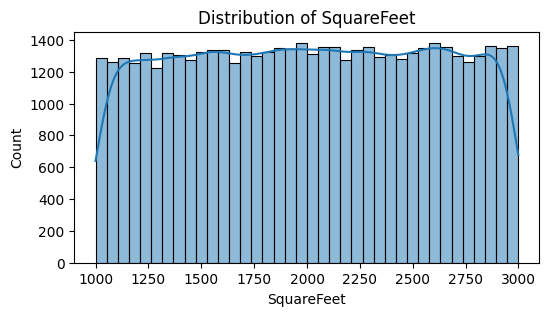

Bedrooms skewness: 0.00


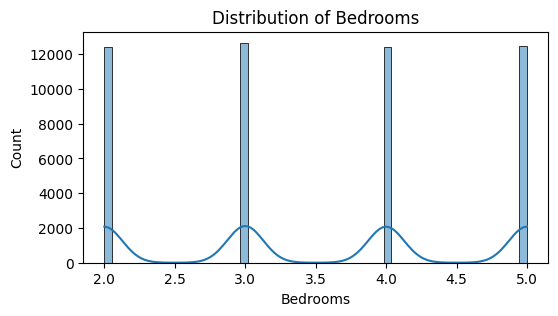

Bathrooms skewness: 0.01


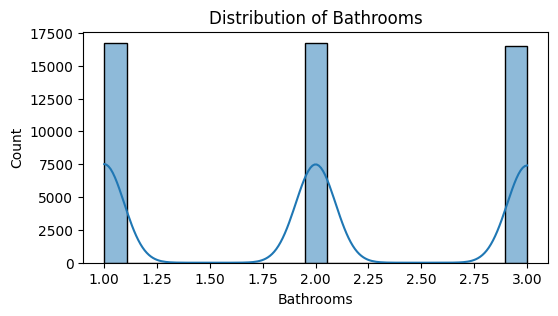

YearBuilt skewness: 0.01


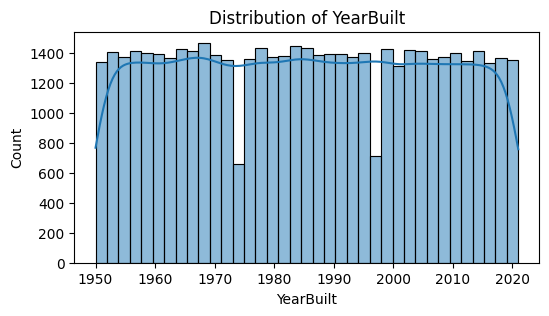

Price skewness: 0.00


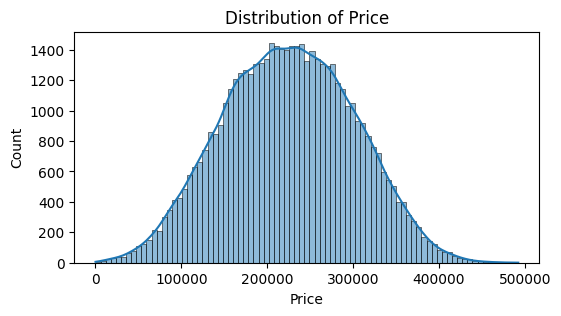

Age skewness: -0.01


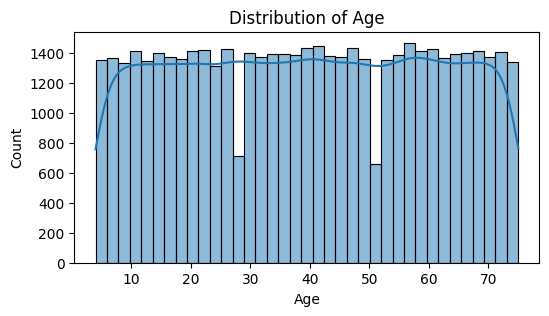

In [36]:
# Numeric variables
numeric_cols = ['SquareFeet','Bedrooms', 'Bathrooms','YearBuilt','Price','Age']
for col in numeric_cols:
    print(f"{col} skewness: {house_price_df[col].skew():.2f}")
    plt.figure(figsize=(6, 3))
    sns.histplot(house_price_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

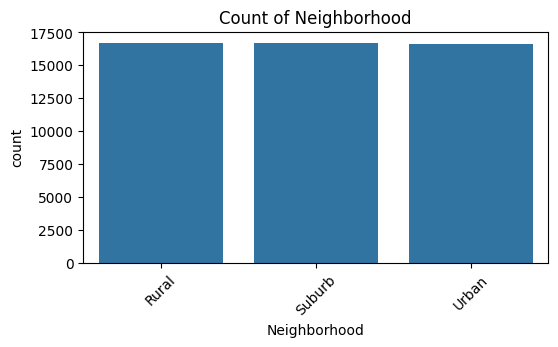

In [37]:
categorical_cols = ['Neighborhood']
for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, data=house_price_df)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()

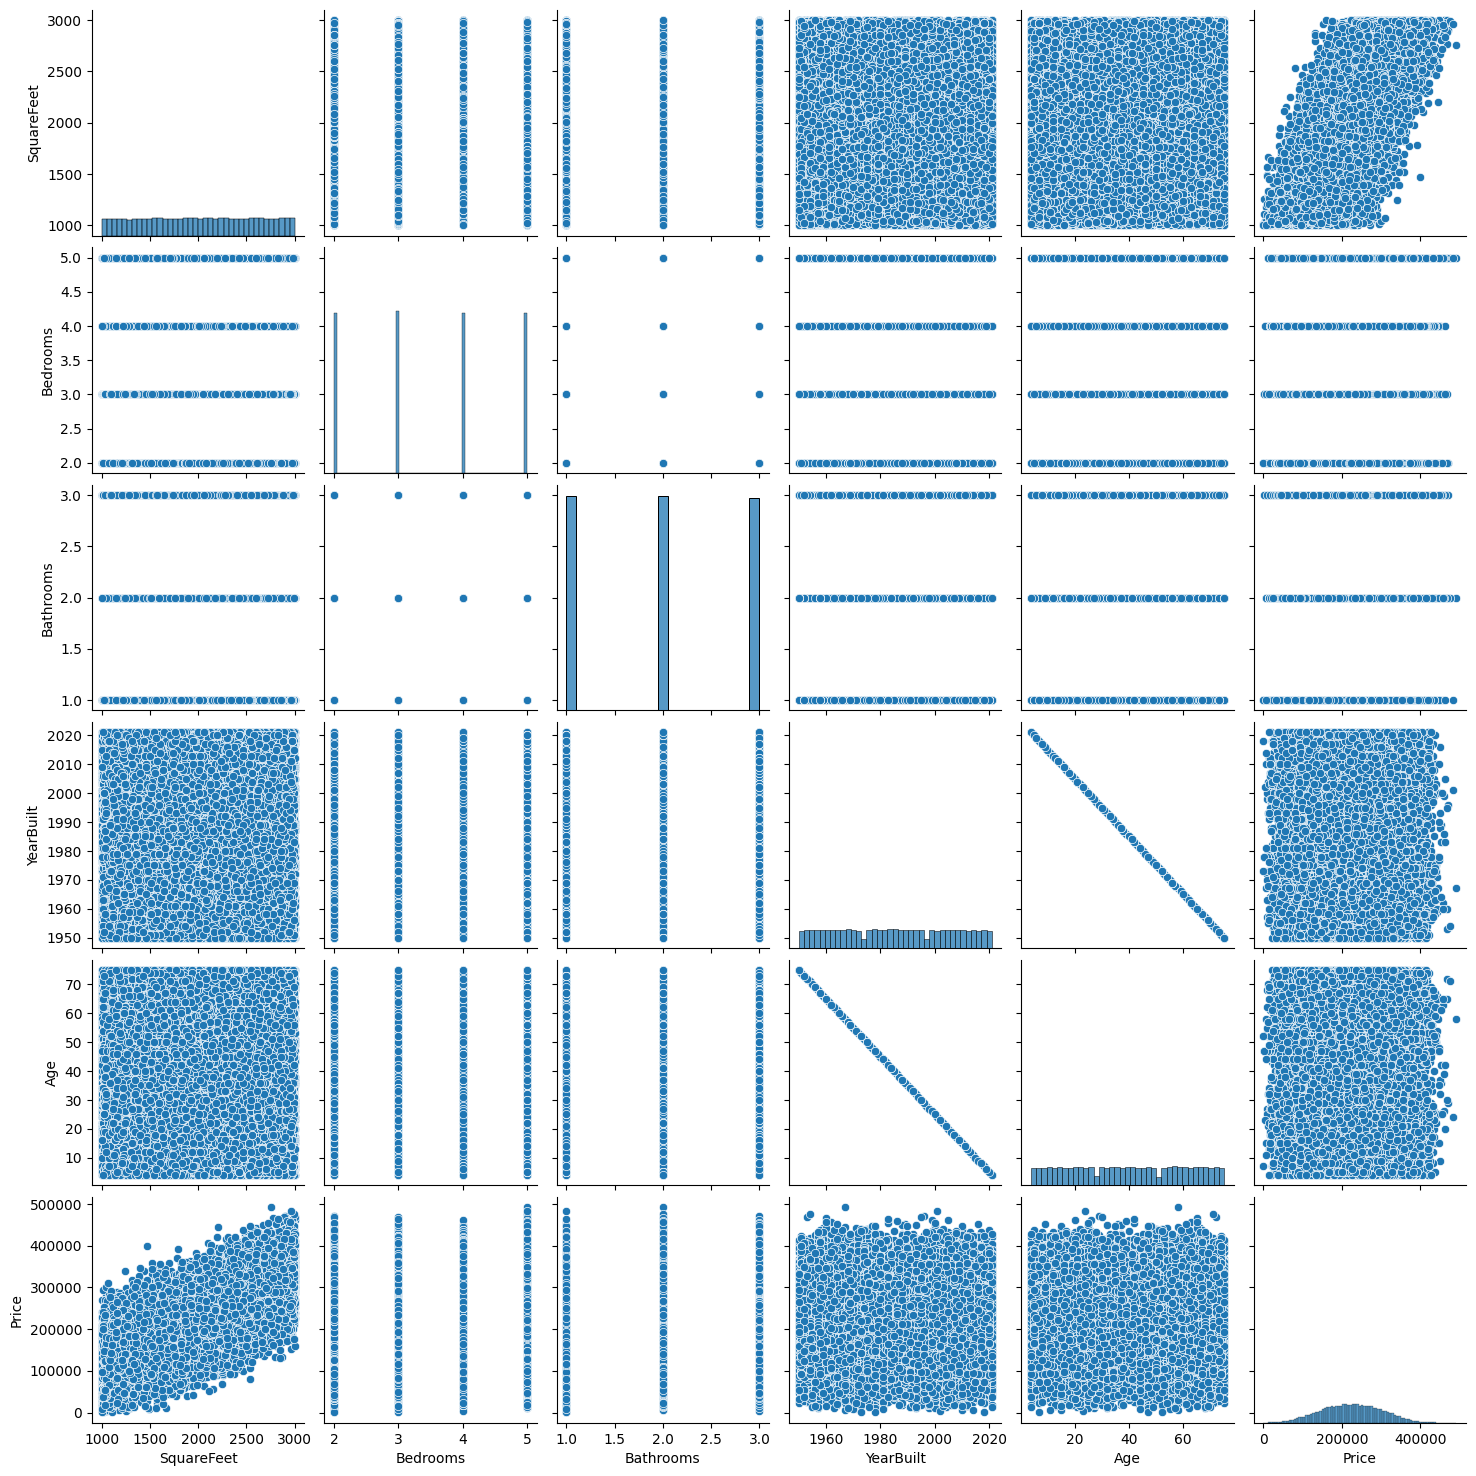

In [38]:
# Pairplot (colored by smoker status)
sns.pairplot(house_price_df[['SquareFeet','Bedrooms','Bathrooms','YearBuilt','Age','Price']])
plt.show()

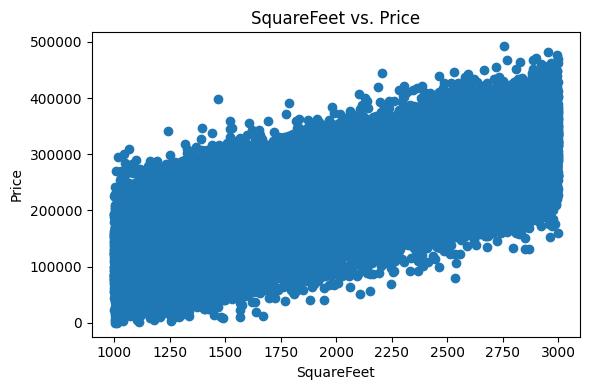

In [39]:
plt.figure(figsize=(6,4))
plt.scatter(house_price_df['SquareFeet'], house_price_df['Price'])
plt.title('SquareFeet vs. Price')
plt.xlabel('SquareFeet')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [40]:
# Check content of "Neighborhood" column
house_price_df["Neighborhood"].value_counts()

Neighborhood
Suburb    16716
Rural     16668
Urban     16594
Name: count, dtype: int64

In [41]:
# Convert into numeric feature (One Hot Encoding)
house_price_df = pd.get_dummies(house_price_df,drop_first= True)
house_price_df.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Age,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,1969,215355.283618,56,False,False
1,2459,3,2,1980,195014.221626,45,False,False
2,1860,2,1,1970,306891.012076,55,True,False
3,2294,2,1,1996,206786.787153,29,False,True
4,2130,5,2,2001,272436.239065,24,True,False


<Axes: >

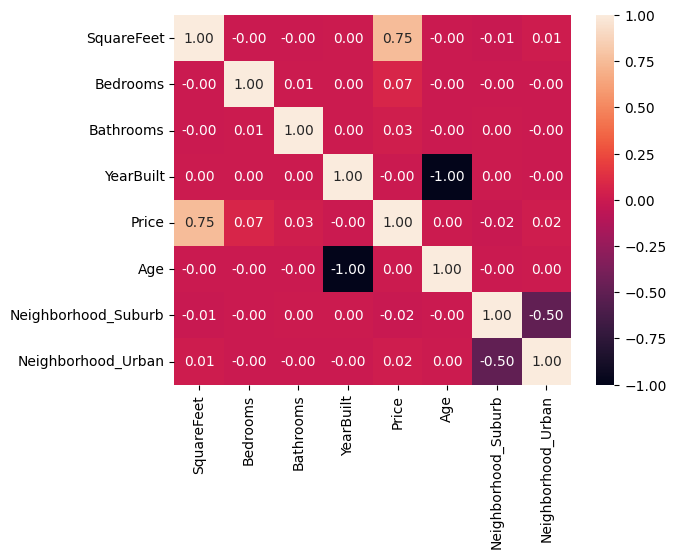

In [42]:
sns.heatmap(house_price_df.corr(), annot=True, fmt=".2f")


In [43]:
X = house_price_df.drop(columns= ['Price','YearBuilt','Age'],axis = 1)
y = house_price_df['Price']

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [47]:
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [48]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate performance
r2score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [49]:
# Print metrics
print("Linear Regression Metrics:")
print(f"R2 Score: {r2score}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Linear Regression Metrics:
R2 Score: 0.5762298031089357
Mean Squared Error: 2450982051.967825
Mean Absolute Error: 39535.903356182695


In [50]:
# x = [i for i in range(len(y_pred))]
# plt.plot(x,y_test,label='Actual')
# plt.plot(x,y_pred,label='Predicted')
# plt.legend()

In [51]:
X_train.shape, X_test.shape

((34984, 5), (14994, 5))

### Logistic Regression
Logistic Regression is a supervised learning algorithm used for **binary classification** problems. It models the probability that a given input belongs to a particular class using the **sigmoid function**.

#### How It Works
Instead of predicting a continuous output like linear regression, logistic regression outputs a **probability between 0 and 1**. If the probability is greater than a threshold (usually 0.5), the input is classified as class 1; otherwise, class 0.



### Hypothesis Function (Sigmoid Function)

$$
h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}
$$

- $h_\theta(x)$: Predicted probability of class 1  
- $\theta$: Parameter vector  
- $x$: Feature vector

---

### Decision Boundary

If:

$$
h_\theta(x) \geq 0.5 \Rightarrow \text{predict class } 1 \\
h_\theta(x) < 0.5 \Rightarrow \text{predict class } 0
$$

---

### Cost Function (Log Loss / Cross-Entropy)

To handle the non-linear nature of the sigmoid function, logistic regression uses the following cost function:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
$$

- $m$: Number of training examples  
- $y^{(i)}$: Actual label (0 or 1)  
- $h_\theta(x^{(i)})$: Predicted probability

---

#### When to Use
- When the output is **categorical**, especially binary (0 or 1).
- When you want probabilistic output and interpretable coefficients.

#### Example Use Cases
- Email spam detection (spam vs. not spam)  
- Disease prediction (positive vs. negative)  
- Loan default classification (default vs. no default)

#### Download dataset

In [52]:
import pandas as pd

url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_table(url, header=None, names=['label', 'message'])

df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Preprocessing The data

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Encode labels: spam = 1, ham = 0
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])  # spam=1, ham=0

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Text to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


#### Train logistic Regression Classifier

In [54]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train_vec, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [55]:
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on test set
y_pred = model.predict(X_test_vec)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['ham', 'spam']))


Accuracy: 0.9695067264573991
Confusion Matrix:
 [[966   0]
 [ 34 115]]

Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



#### Check on real data

In [56]:
sample = [
    "Congratulations! You've won a $1000 Walmart gift card. Call now!",
    "Claim your free prize now",
    "Let's schedule a meeting tomorrow"
]
sample_vec = vectorizer.transform(sample)
print("Prediction:", model.predict(sample_vec))

for email, label in zip(sample, predictions):
  print(f"Email: '{email}' -> {'Spam' if label == 1 else 'Ham'}")


Prediction: [0 1 0]
Email: 'Congratulations! You've won a $1000 Walmart gift card. Call now!' -> Ham
Email: 'Claim your free prize now' -> Ham
Email: 'Let's schedule a meeting tomorrow' -> Ham


## Naive Bayes Algorithm

* **MultinomialNB:** Use for text classification with word count or frequency features.
* **BernoulliNB:** Use for text classification with binary (presence/absence) features.
* **GaussianNB:** Use for classification with continuous numerical features following a normal distribution.


In [57]:
from sklearn.naive_bayes import MultinomialNB

# initialize the model
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [58]:
test_emails = [
    "Congratulations! You've won a $1000 Walmart gift card. Call now!",
    "Claim your free prize now",
    "Let's schedule a meeting tomorrow"
]
X_test_vec = vectorizer.transform(test_emails)

# Predict
predictions = nb_model.predict(X_test_vec)
for email, label in zip(test_emails, predictions):
  print(f"Email: '{email}' -> {'Spam' if label == 1 else 'Ham'}")

Email: 'Congratulations! You've won a $1000 Walmart gift card. Call now!' -> Ham
Email: 'Claim your free prize now' -> Spam
Email: 'Let's schedule a meeting tomorrow' -> Ham


## K-Nearest Neighbours Algorithm
KNN is a lazy learner — it simply stores the training data during fit() and does not perform iterative training or optimization like models such as logistic regression or neural networks.

In [59]:
data = [
  {"Weight": 260, "Height": 162, "Animal": "Horse"},
  {"Weight": 33, "Height": 90, "Animal": "Dog"},
  {"Weight": 150, "Height": 210, "Animal": "Horse"},
  {"Weight": 25, "Height": 70, "Animal": "Dog"},
  {"Weight": 38, "Height": 82, "Animal": "Dog"},
  {"Weight": 320, "Height": 175, "Animal": "Horse"},
  {"Weight": 29, "Height": 98, "Animal": "Dog"},
  {"Weight": 200, "Height": 170, "Animal": "Horse"},
  {"Weight": 39, "Height": 108, "Animal": "Dog"},
  {"Weight": 210, "Height": 172, "Animal": "Horse"},
  {"Weight": 45, "Height": 85, "Animal": "Dog"},
  {"Weight": 275, "Height": 185, "Animal": "Horse"},
  {"Weight": 20, "Height": 75, "Animal": "Dog"},
  {"Weight": 300, "Height": 178, "Animal": "Horse"},
  {"Weight": 50, "Height": 95, "Animal": "Dog"},
  {"Weight": 180, "Height": 165, "Animal": "Horse"},
  {"Weight": 65, "Height": 100, "Animal": "Dog"},
  {"Weight": 240, "Height": 180, "Animal": "Horse"},
  {"Weight": 28, "Height": 72, "Animal": "Dog"},
  {"Weight": 210, "Height": 170, "Animal": "Horse"}
]


In [60]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier


df = pd.DataFrame(data)

# Encode labels: Dog = 0, Horse = 1
df['Label'] = df['Animal'].map({'Dog': 0, 'Horse': 1})

X = df[['Weight', 'Height']].values
y = df['Label'].values


In [61]:
class KNNFromScratch:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        preds = []
        for x in X_test:
            # Compute Euclidean distances to all training points
            distances = np.linalg.norm(self.X_train - x, axis=1)
            # Find indices of k nearest neighbors
            k_indices = distances.argsort()[:self.k]
            # Get the labels of these neighbors
            k_labels = self.y_train[k_indices]
            # Majority vote
            most_common = Counter(k_labels).most_common(1)[0][0]
            preds.append(most_common)
        return np.array(preds)

In [62]:
# imported method
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [63]:
# created method
knn_scratch = KNNFromScratch(k=3)
knn_scratch.fit(X, y)

In [64]:
X_test = np.array([
    [35, 90],   # Likely Dog
    [210, 180], # Likely Horse
    [50, 105],  # Likely Dog
    [280, 172]  # Likely Horse
])


preds1 = knn.predict(X_test)

for point, pred in zip(X_test, preds1):
    animal = 'Dog' if pred == 0 else 'Horse'
    print(f"Data point {point} predicted as: {animal}")

print("-------------------------------------------")

preds2 = knn_scratch.predict(X_test)

for point, pred in zip(X_test, preds2):
    animal = 'Dog' if pred == 0 else 'Horse'
    print(f"Data point {point} predicted as: {animal}")


Data point [35 90] predicted as: Dog
Data point [210 180] predicted as: Horse
Data point [ 50 105] predicted as: Dog
Data point [280 172] predicted as: Horse
-------------------------------------------
Data point [35 90] predicted as: Dog
Data point [210 180] predicted as: Horse
Data point [ 50 105] predicted as: Dog
Data point [280 172] predicted as: Horse


## Decision Tree Algorithm  
A Decision Tree Classifier makes predictions by splitting data based on features into simple decision rules. It’s easy to understand but can overfit if it becomes too complex.


#### Simple Intuition

---


Imagine you want to decide if someone likes playing basketball based on two features: **Age** and **Height**.

* First, you ask: **Is the person taller than 6 feet?**

  * If **Yes**, then you predict **Likes Basketball** because taller people often like it.
  * If **No**, then ask: **Is the person younger than 15?**

    * If **Yes**, predict **Does not like basketball** (maybe too young).
    * If **No**, predict **Likes basketball** (older but shorter players may still like it).

The tree asks simple questions to split the data and reach a decision step-by-step.


#### Data Preparation

In [65]:
import pandas as pd

data = {
    'Gender': [
        'Man', 'Woman', 'Woman', 'Man', 'Man', 'Woman', 'Man', 'Woman', 'Woman', 'Man',
        'Woman', 'Man', 'Woman', 'Man', 'Woman', 'Man', 'Woman', 'Man', 'Woman', 'Man'
    ],
    'Age': [
        12, 25, 19, 22, 30, 17, 14, 28, 23, 15,
        20, 18, 16, 29, 11, 13, 27, 24, 21, 26
    ],
    'Likes_Sport': [
        'Like', 'Not Like', 'Like', 'Like', 'Not Like', 'Like', 'Not Like', 'Like', 'Not Like', 'Like',
        'Like', 'Not Like', 'Like', 'Like', 'Not Like', 'Not Like', 'Like', 'Like', 'Not Like', 'Like'
    ]
}


df = pd.DataFrame(data)

# Encode categorical columns:
df['Gender'] = df['Gender'].map({'Man': 1, 'Woman': 0})
df['Likes_Sport'] = df['Likes_Sport'].map({'Like': 1, 'Not Like': 0})

print("\nDataFrame after encoding:")
df.head(4)



DataFrame after encoding:


,Gender,Age,Likes_Sport
0,1,12,1
1,0,25,0
2,0,19,1
3,1,22,1


In [66]:
from sklearn.tree import DecisionTreeClassifier

X = df[['Gender', 'Age']]
y = df['Likes_Sport']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)# Stratified split to keep class distribution, on train and test

# Initialize the model decision tree classifier, TO overcome overfitting you can put here max-depth as well
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [67]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy:.2f}")

# Example prediction
example = [[1, 20]]  # Man, Age 20
prediction = clf.predict(example)
print(f"Prediction for example {example}: {'Like' if prediction[0] == 1 else 'Not Like'}")

Accuracy on test data: 0.83
Prediction for example [[1, 20]]: Like


c:\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**Random Forest** is like having many decision trees instead of just one. Each tree is trained on a random sample of the data and uses random subsets of features to make splits. When making a prediction, the random forest combines the results from all these trees (usually by majority vote for classification). This approach helps reduce errors and overfitting, making the model more accurate and reliable than a single decision tree.

## K-Means Clustering

K-Means is an **unsupervised learning algorithm** used to partition a dataset into **K distinct clusters** by minimizing the variance within each cluster.

#### Hot it works:
1. Initialize K centroids randomly.  
2. Assign each data point to the nearest centroid (based on distance, usually Euclidean).  
3. Update each centroid to be the mean of points assigned to it.  
4. Repeat steps 2 and 3 until convergence (no change in centroids or assignments).


####  When to Use
- When you want to find **natural groupings** in data without labels.  
- When you know or can guess the number of clusters \(K\).  
- For customer segmentation, image compression, anomaly detection, etc.

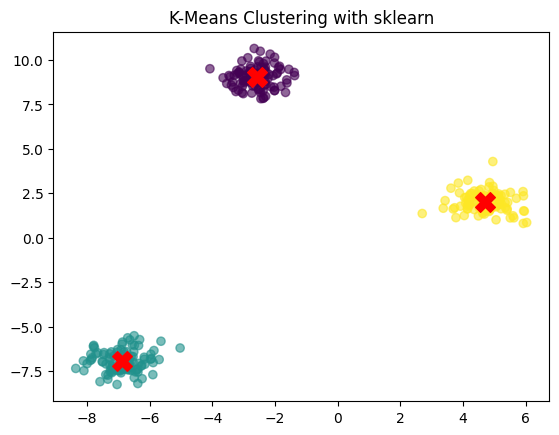

In [68]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data with 3 clusters
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')

plt.title("K-Means Clustering with sklearn")
plt.show()


Implementation of K-Mean Clustering on Small Dataset.

In [70]:
# Example dataset: [Weight(kg), Height(cm)]
# Dogs (lighter & shorter) and Horses (heavier & taller)
X_train  = np.array([
    [25, 70], [20, 75], [38, 82], [39, 108], [29, 98], [65, 100],   # Dogs
    [150, 210], [200, 170], [180, 165], [320, 175], [260, 162], [290, 168]  # Horses
])

k = 2  # number of clusters

# Randomly initialize centroids
np.random.seed(42)
centroids = X_train[np.random.choice(X_train.shape[0], k, replace=False)]

print("Initial Centroids:\n", centroids)

for _ in range(100):  # max iterations
    distances = np.linalg.norm(X_train[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)
    new_centroids = np.array([X_train[labels == i].mean(axis=0) for i in range(k)])
    if np.all(centroids == new_centroids):
        break
    centroids = new_centroids

print("Final Centroids (Trained):\n", centroids)


Initial Centroids:
 [[260 162]
 [320 175]]
Final Centroids (Trained):
 [[ 36.          88.83333333]
 [233.33333333 175.        ]]


In [71]:
X_test = np.array([
    [19, 54],   # Likely Dog
    [370, 167], # Likely Horse
    [21, 58],   # Likely Dog
    [410, 172]  # Likely Horse
])

distances_test = np.linalg.norm(X_test[:, np.newaxis] - centroids, axis=2)
predicted_labels = np.argmin(distances_test, axis=1)

print("\nInference Results:")
for i,(point, label) in enumerate(zip(X_test, predicted_labels)):
    animal = "Dog" if label == np.argmin([np.linalg.norm([20,55]-c) for c in centroids]) else "Horse"
    print(f"Data Test_{i+1} {point} -> Cluster {label} ({animal})")




Inference Results:
Data Test_1 [19 54] -> Cluster 0 (Dog)
Data Test_2 [370 167] -> Cluster 1 (Horse)
Data Test_3 [21 58] -> Cluster 0 (Dog)
Data Test_4 [410 172] -> Cluster 1 (Horse)


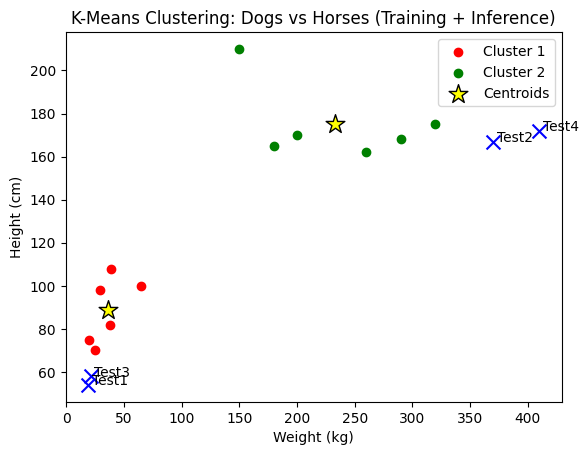

In [72]:
colors = ['r', 'g']
for i in range(k):
    plt.scatter(X_train[labels == i, 0], X_train[labels == i, 1], color=colors[i], label=f"Cluster {i+1}")
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, color='yellow', marker='*', edgecolor='k', label='Centroids')

# Plot new data points
for i, point in enumerate(X_test):
    plt.scatter(point[0], point[1], color='blue', marker='x', s=100)
    plt.text(point[0]+3, point[1], f"Test{i+1}")

plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.title("K-Means Clustering: Dogs vs Horses (Training + Inference)")
plt.legend()
plt.show()

### Machine Learning Model Performance Evaluation

Why evaluate ML models?
- To understand how well a model performs on unseen data.
- To compare different models or algorithms.
- To avoid overfitting and underfitting.
- To ensure the model meets business or project goals.

## Overfitting and Underfitting:

### Overfitting
When a model learns the training data too well, including its noise and random fluctuations, instead of just the underlying pattern.  
Very low error on training data but poor performance on new/unseen data (high test error).  
To overcome this:  
- Use simpler models.
- More training data.
- Apply regularization (L1, L2).
- Early stopping during training.

### Underfitting  
When a model is too simple to capture the underlying pattern of the data. It fails to learn from the training data sufficiently.  
High error on training data and test data.   
To overcome this:  
- Use more complex models.
- Add more relevant features.
- Reduce regularization.
- Train longer or with more data.

### Regularization

Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function.

#### L1 Regularization (Lasso)

Adds the sum of absolute values of coefficients as a penalty:

$$
\text{Loss} + \lambda \sum_{j} |\beta_j|
$$
Encourages sparsity, meaning some coefficients become exactly zero, which can perform feature selection.



#### L2 Regularization (Ridge)

Adds the sum of squared coefficients as a penalty:

$$
\text{Loss} + \lambda \sum_{j} \beta_j^2
$$
Shrinks coefficients towards zero but usually doesn’t make them exactly zero.

NOTE *βj = weight/parameter for the jth feature in your model.*

## Types of Evaluation Metrics

### For Classification Models

- **Accuracy:**  
  Proportion of correctly predicted instances over total instances.  
  Accuracy = (TP + TN) / (TP + TN + FP + FN)

- **Precision:**  
  Of all positive predictions, how many are actually positive?  
  Precision = TP / (TP + FP)

- **Recall (Sensitivity or True Positive Rate):**  
  Of all actual positives, how many were predicted correctly?  
  Recall = TP / (TP + FN)

- **F1-Score:**  
  Harmonic mean of precision and recall. Useful when there is class imbalance.  
  F1 = 2 × (Precision × Recall) / (Precision + Recall)

- **Confusion Matrix:**  
  A table showing TP, TN, FP, FN values to visualize model performance.

- **ROC Curve and AUC (Area Under Curve):**  
  Plot of True Positive Rate vs False Positive Rate at various threshold settings.  
  AUC indicates overall ability to discriminate between classes.

- **Log Loss / Cross-Entropy Loss:**  
  Measures uncertainty of predictions by penalizing wrong confident predictions.

---

### For Regression Models

- **Mean Absolute Error (MAE):**  
  Average absolute difference between actual and predicted values.  
  MAE = (1/n) × Σ |yi − ŷi|

- **Mean Squared Error (MSE):**  
  Average squared difference between actual and predicted values.  
  MSE = (1/n) × Σ (yi − ŷi)²

- **Root Mean Squared Error (RMSE):**  
  Square root of MSE, more interpretable as it has same units as target.  
  RMSE = √MSE

- **R-squared (Coefficient of Determination):**  
  Proportion of variance in the dependent variable explained by the model.  
  R² = 1 − (Σ (yi − ŷi)²) / (Σ (yi − ȳ)²)


### Confusion Matrix

A confusion matrix is a table that summarizes the performance of a classification model by showing counts of:

|                | Predicted Positive | Predicted Negative |
|----------------|--------------------|--------------------|
| **Actual Positive** | True Positive (TP)  | False Negative (FN) |
| **Actual Negative** | False Positive (FP) | True Negative (TN)  |

- **TP:** Correctly predicted positive  
- **FP:** Incorrectly predicted positive  
- **FN:** Incorrectly predicted negative  
- **TN:** Correctly predicted negative  

---



### Precision

Precision is the ratio of correctly predicted positive observations to the total predicted positives.  
It answers: *Of all instances predicted as positive, how many are actually positive?*

**Formula:**  
Precision = TP / (TP + FP)

---

### Recall

Recall (also called Sensitivity) is the ratio of correctly predicted positive observations to all actual positives.  
It answers: *Of all actual positive instances, how many did the model correctly identify?*

**Formula:**  
Recall = TP / (TP + FN)


Recall is important when missing positive cases is costly, such as in disease detection, where you want to find as many true cases as possible.

Precision is important when false positives are costly, like in email spam detection, where you want to avoid wrongly marking important emails as spam.